In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/language-identification-datasst/dataset.csv


In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [3]:
data = pd.read_csv("../input/language-identification-datasst/dataset.csv")
data.head(10)

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
5,エノが行きがかりでバスに乗ってしまい、気分が悪くなった際に助けるが、今すぐバスを降りたいと運...,Japanese
6,tsutinalar i̇ngilizce tsuutina kanadada albert...,Turkish
7,müller mox figura centralis circulorum doctoru...,Latin
8,برقی بار electric charge تمام زیرجوہری ذرات کی...,Urdu
9,シャーリー・フィールドは、サン・ベルナルド・アベニュー沿い市民センターとrtマーティン高校に...,Japanese


In [4]:
data.shape

(22000, 2)

In [5]:
data=data.iloc[:6000,:]

In [6]:
data.shape

(6000, 2)

In [7]:
data["language"].value_counts()

Russian       288
Persian       285
Japanese      284
Arabic        278
Swedish       278
Hindi         278
Turkish       278
French        276
Dutch         275
English       275
Indonesian    274
Thai          274
Portugese     273
Korean        270
Spanish       270
Tamil         270
Pushto        269
Estonian      267
Urdu          263
Latin         261
Chinese       259
Romanian      255
Name: language, dtype: int64

In [8]:
X = data["Text"]
y = data["language"]

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [10]:
data_list = []

for text in X:
       
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        
        text = text.lower()
        data_list.append(text)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
X.shape

(6000, 102337)

In [12]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [13]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [14]:
y_pred = model.predict(x_test)

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy is :",ac)

Accuracy is : 0.9333333333333333


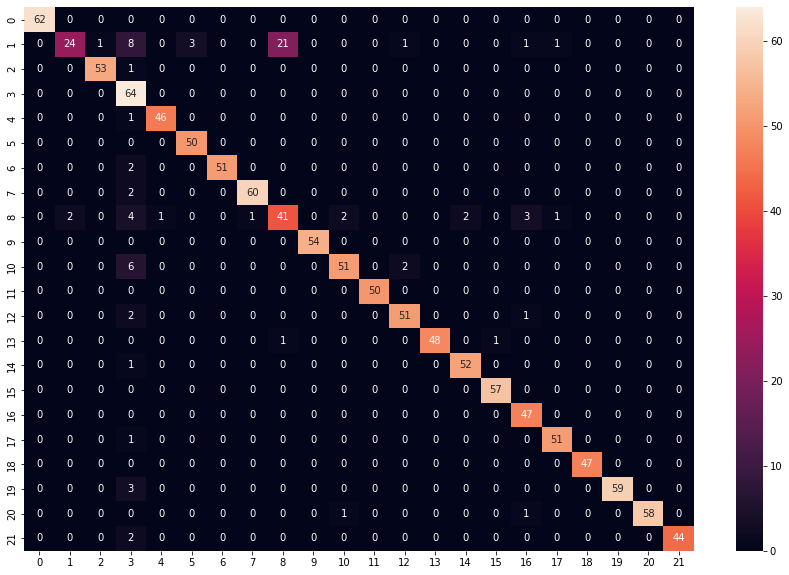

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [17]:
def predict(text):
     x = cv.transform([text]).toarray() # converting text to bag of words model (Vector)
     lang = model.predict(x) # predicting the language
     lang = le.inverse_transform(lang) # finding the language corresponding the the predicted value
     print("The langauge is in",lang[0])

In [18]:
predict("my name is zisun")

The langauge is in English


In [19]:
predict("mi nombre es zisun")

The langauge is in Spanish


In [20]:
predict("என் பெயர் ஜிசுன்")

The langauge is in Tamil


In [21]:
predict("mitt namn är zisun")

The langauge is in Swedish


In [22]:
predict("내 이름은 zisun")

The langauge is in Korean


In [23]:
predict("меня зовут цисун")

The langauge is in Russian
